In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
# %reload_ext autoreload

In [63]:
from pathlib import Path
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import homography, rectification, filters, my_types, utils

In [6]:
DATA = Path("data")
OUTDIR = Path("output")

# Pick Correspondences

In [19]:
PICK_NEW = False
im1_name = DATA / "doll1.jpg"
im2_name = DATA / "doll2.jpg"
im3_name = DATA / "doll3.jpg"

if PICK_NEW:
    %matplotlib tk
    im1_pts = utils.pick_points(im1_name, 8)
    im2_pts = utils.pick_points(im2_name, 8)
    # im3_pts = utils.pick_points(im3_name, 8)
    utils.save_points(im1_pts, im1_name)
    utils.save_points(im2_pts, im2_name)
    # utils.save_points(im3_pts, im3_name)
else:
    %matplotlib inline
    im1_pts = utils.load_points(im1_name)
    im2_pts = utils.load_points(im2_name)
    # im3_pts = utils.load_points(im3_name)

In [20]:
im1_pts = im1_pts[:4]
im2_pts = im2_pts[:4]

In [44]:
im1 = utils.read_img(im1_name)
im2 = utils.read_img(im2_name)
# im3 = utils.read_img(im3_name)

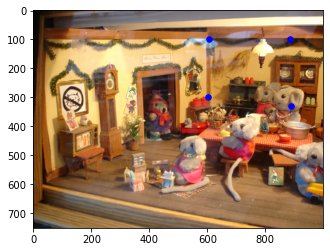

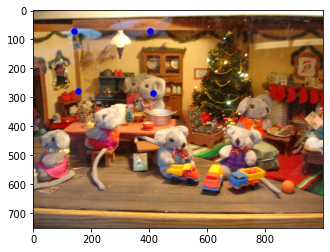

In [22]:
utils.plot_pts(im1, im1_pts)
utils.plot_pts(im2, im2_pts)

# Image Rectification

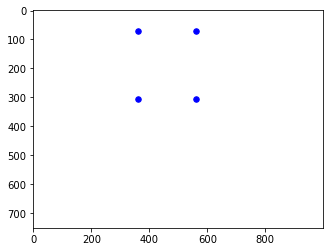

In [105]:
plane_pts = np.array([[360,  70], [360, 306], [560 , 306], [560,  70]])
canvas = np.ones_like(im1)
utils.plot_pts(canvas, plane_pts)

In [36]:
try:
    warp1 = utils.read_img(OUTDIR / "doll1_w.jpg")
    warp_pts1 = utils.load_points(OUTDIR / "doll1_w.pkl")

except:
    print("warping...")

    h_matrix1 = homography.homo_matrix(im1_pts, plane_pts)
    warp1, shift_pts1 = homography.forward_warp(im1, h_matrix1)
    warp_pts1 = homography.warp_pts(im1_pts, h_matrix1, shift_pts1)
    
    plt.imsave(OUTDIR / "doll1_w.jpg", warp1)
    utils.save_points(warp_pts1, OUTDIR / "doll1_w.pkl")

In [37]:
try:
    warp2 = utils.read_img(OUTDIR / "doll2_w.jpg")
    warp_pts2 = utils.load_points(OUTDIR / "doll2_w.pkl")

except:
    print("warping...")
    
    h_matrix2 = homography.homo_matrix(im2_pts, plane_pts)
    warp2, shift_pts2= homography.forward_warp(im2, h_matrix2)
    warp_pts2 = homography.warp_pts(im2_pts, h_matrix2, shift_pts2)

    plt.imsave(OUTDIR / "doll2_w.jpg", warp2)
    utils.save_points(warp_pts2, OUTDIR / "doll2_w.pkl")

In [38]:
warp_pts1

array([[727., 168.],
       [727., 404.],
       [927., 404.],
       [927., 168.]])

In [39]:
warp_pts2

array([[159.,  82.],
       [159., 318.],
       [359., 318.],
       [359.,  82.]])

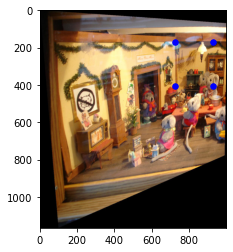

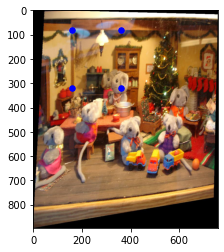

In [40]:
utils.plot_pts(warp1, warp_pts1)
utils.plot_pts(warp2, warp_pts2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


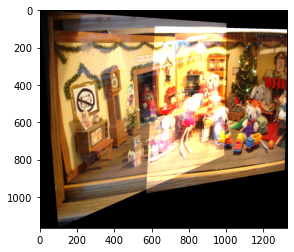

In [42]:
aligned1, aligned2 = rectification.align(warp1, warp2, warp_pts1, warp_pts2)

# plt.imshow(aligned1)
# plt.imshow(aligned2)
plt.imshow(aligned1 + aligned2)

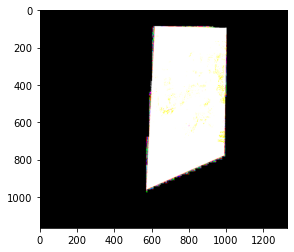

In [61]:
overlap = rectification.overlap(aligned1, aligned2)
plt.imshow(overlap)

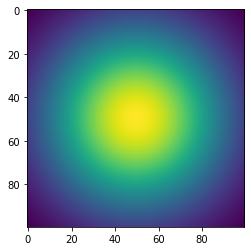

In [98]:
g = filters.gaussian_filter(kernel_size=100, sigma=30)
plt.imshow(g)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


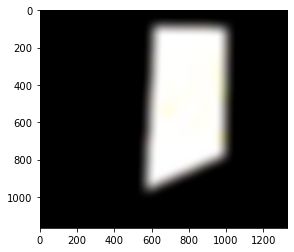

In [99]:
mask = filters.gauss_blur(overlap, kernel_size=100, sigma=30)
plt.imshow(mask)

In [102]:
blended = rectification.alpha_blend(aligned1, aligned2, mask)
blended.shape

(1167, 1328, 3)

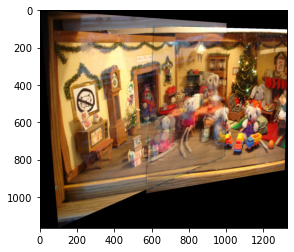

In [103]:
plt.imshow(blended)

In [104]:
plt.imsave(OUTDIR / "doll_mosaic.jpg", blended)